# Heart Disease Prediction Project (Data Exploration)

### Dataset

The dataset has 14 attributes:
 
* **age:** age in years.

* **sex:** sex (1 = male; 0 = female).

* **cp:** chest pain type (Value 0: typical angina; Value 1: atypical angina; Value 2: non-anginal pain; Value 3: asymptomatic).

* **trestbps:** resting blood pressure in mm Hg on admission to the hospital.

* **chol:** serum cholestoral in mg/dl.

* **fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

* **restecg:** resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality; Value 2: probable or definite left ventricular hypertrophy).

* **thalach:** maximum heart rate achieved.

* **exang:** exercise induced angina (1 = yes; 0 = no)

* **oldpeak:** ST depression induced by exercise relative to rest.

* **slope:** the slope of the peak exercise ST segment (Value 0: upsloping; Value 1: flat; Value 2: downsloping).

* **ca:** number of major vessels (0-3) colored by flourosopy.

* **thal:** thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect).

* **target:** heart disease (1 = no, 2 = yes)


In [2]:
# Import required libraries

import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import re

# for plotting 
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

In [4]:
# Read data in the excel file
df = pd.read_csv('data.csv')

# show the first five rows of the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [5]:
# shape of the dataframe (rows and columns)
df.shape

(270, 14)

In [6]:
# provides all the information about the dataset. (checks for errors or null values as well)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [7]:
# Description of the dataframe(mean, median, minimum value, maximum value etc)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [8]:
# Check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# target is heart disease (1 = no, 2 = yes) (number of people with and without heart disease)
df['target'].value_counts()

1    150
2    120
Name: target, dtype: int64

In [10]:
# Percentage of patients with and without heart disease
df['target'].value_counts()/df.shape[0]*100 

1    55.555556
2    44.444444
Name: target, dtype: float64

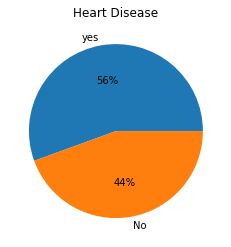

In [11]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

**Note:**

As you can see, the dataset contains 14 columns 5 of them are numerical values and 9 of them are categorical values. We can see also there are no missing values in this dataset. As for the data balancing, the data is relatively balanced, 56% of the persons in the dataset have heart disease.

### Attributes Correlation

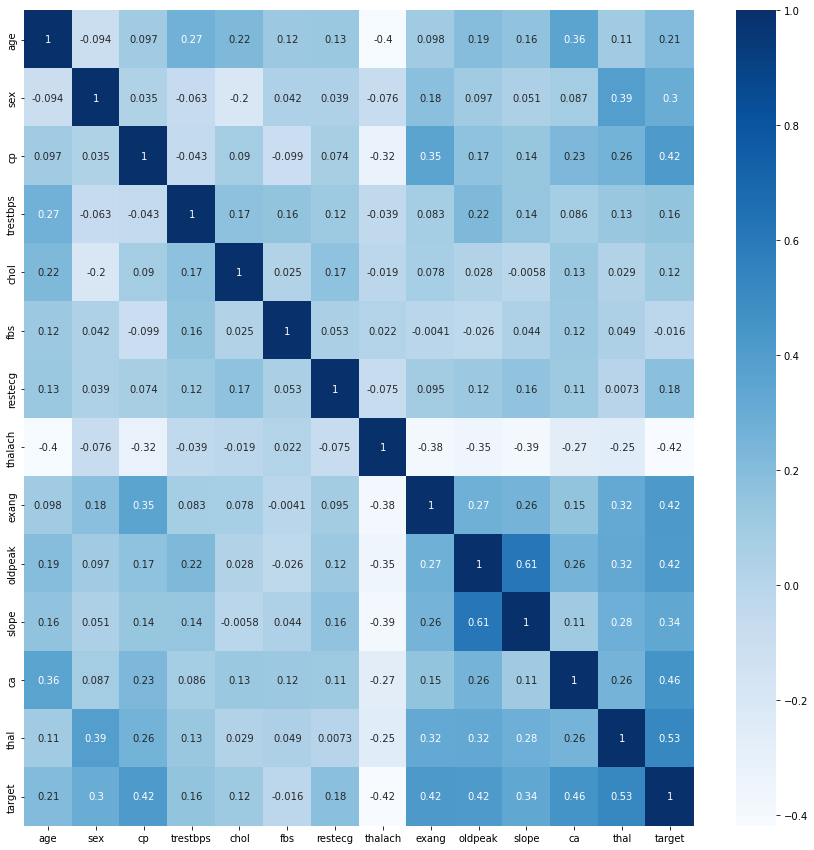

In [12]:
# Correlation (the relationship between the columns of the dataset) map
plt.figure(figsize=(15, 15))

sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

**Note:**

From the above correlation plot, the chest pain type (cp), exercise induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels (0-3) colored by flourosopy (ca) and thalassemia (thal) are correlated with the heart disease (target) directly.  We see also that there is an inverse proportion between the heart disease and maximum heart rate (thalch).

We can see also, there are a relation between the following attributes:

* The number of major vessels (0-3) colored by flourosopy (ca) and the age.
* ST depression induced by exercise relative to rest (oldpeak) and the slope of the peak exercise ST segment (slope).
* The chest pain type (cp), exercise induced angina (exang).
* maximum heart rate (thalch) and the age.


Next, I will explore each attribute and then explore the found correlations.

### Age Exploration

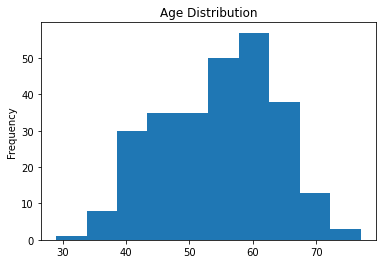

In [13]:
# Display age distribution
df['age'].plot(kind = 'hist', title = 'Age Distribution')

plt.show()

In [14]:
# Get minimun, maximum and average of the age
print('Min age: ', min(df['age']))

print('Max age: ', max(df['age']))
print('Average age: ', df['age'].mean())

Min age:  29
Max age:  77
Average age:  54.43333333333333


C:\Users\Hassan\Anaconda3\envs\TensorFlow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Hassan\Anaconda3\envs\TensorFlow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



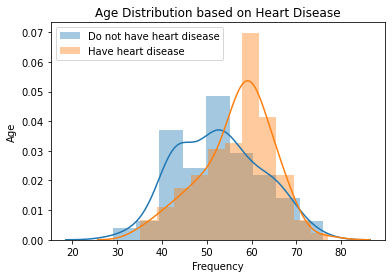

In [15]:
# Display age distribution based on heart disease
sns.distplot(df[df['target'] == 1]['age'], label='Do not have heart disease')
sns.distplot(df[df['target'] == 2]['age'], label = 'Have heart disease')

plt.xlabel('Frequency')
plt.ylabel('Age')

plt.title('Age Distribution based on Heart Disease')
plt.legend()

plt.show()

In [16]:
# Get minimum, maximum and average age of the people that do not have heart diseas

print('Min age of people who do not have heart disease: ', min(df[df['target'] == 1]['age']))

print('Max age of people who do not have heart disease: ', max(df[df['target'] == 1]['age']))

print('Average age of people who do not have heart disease: ', df[df['target'] == 1]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.70666666666666


In [ ]:
# Get minimum, maximum and average age of the people that have heart diseas
\
print('Min age of people who have heart disease: ', min(df[df['target'] == 2]['age']))

print('Max age of people who have heart disease: ', max(df[df['target'] == 2]['age']))

print('Average age of people who have heart disease: ', df[df['target'] == 2]['age'].mean())

**Note:**

From the data, I can say that the heart disease infects the old and young people, and the probability of the old people te be infected is higher than young people.  

### Gender Exploration

In [ ]:
# Number of males and females in the dataset
F = df[df['sex'] == 0].count()['target']
M = df[df['sex'] == 1].count()['target']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])

plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')

plt.show()

### Chest Pain Type Exploration

In [ ]:
# Display chest pain types in bar chart
df.groupby(df['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))

plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)

plt.show()

In [ ]:
# Display chest pain types based on the target(people having heart disease and people not having heart disease)
pd.crosstab(df.cp,df.target).plot(kind = "bar", figsize = (8, 6))

plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')

plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')

plt.show()

**Note:**

We can see that most of the people with heart disease have asymptomatic chest pain.

### Blood Pressure Exploration 

In [ ]:
# Display blood pressure distribution
df['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

In [ ]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 1]['trestbps'], label='Do not have heart disease', ax = axis1)

ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 2]['trestbps'], label = 'Have heart disease', ax = axis2)

ax.set(xlabel='People Have Heart Disease')
plt.show()

In [ ]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(df[df['target'] == 1]['trestbps']))

print('Max blood pressure of people who do not have heart disease: ', max(df[df['target'] == 1]['trestbps']))

print('Average blood pressure of people who do not have heart disease: ', df[df['target'] == 1]['trestbps'].mean())

In [ ]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(df[df['target'] == 2]['trestbps']))

print('Max blood pressure of people who have heart disease: ', max(df[df['target'] == 2]['trestbps']))

print('Average blood pressure of people who have heart disease: ', df[df['target'] == 2]['trestbps'].mean())

### Cholestoral Exploration 

In [ ]:
# Display Cholestoral distribution
df['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

In [ ]:
# Display Cholestoral distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))

ax = sns.distplot(df[df['target'] == 1]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')

ax = sns.distplot(df[df['target'] == 2]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')

plt.show()

In [ ]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(df[df['target'] == 1]['chol']))

print('Max cholestoral of people who do not have heart disease: ', max(df[df['target'] == 1]['chol']))

print('Average cholestoral of people who do not have heart disease: ', df[df['target'] == 1]['chol'].mean())

In [ ]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(df[df['target'] == 2]['chol']))

print('Max cholestoral of people who have heart disease: ', max(df[df['target'] == 2]['chol']))

print('Average cholestorale of people who have heart disease: ', df[df['target'] == 2]['chol'].mean())

### Fasting Blood Sugar  Exploration 

In [ ]:
# Display fasting blood sugar in bar chart
df.groupby(df['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))

plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

In [ ]:
# Display fasting blood sugar based on the target
pd.crosstab(df.fbs,df.target).plot(kind = "bar", figsize = (8, 6))

plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')

plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')

plt.show()

###  Electrocardiographic Results Exploration

In [ ]:
# Display electrocardiographic results in bar chart
df.groupby(df['restecg']).count()['target'].plot(kind = 'bar', 
                                                 title = 'Resting Electrocardiographic Results', figsize = (8, 6))

plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))

plt.show()

In [ ]:
# Display resting electrocardiographic results based on the target
pd.crosstab(df.restecg,df.target).plot(kind = "bar", figsize = (8, 6))

plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))

plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')

plt.show()

**Note:**

Usually the people who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have probable or left ventricular hypertrophy.

### Maximum Heart Rate Exploration

In [ ]:
# Display maximum heart rate distribution
df['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

In [ ]:
# Display maximum heart rate distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))

ax = sns.distplot(df[df['target'] == 1]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')

ax = sns.distplot(df[df['target'] == 2]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')

plt.show()

In [ ]:
# Get min, max and average of the maximum heart rate of the people do not have heart diseas
print('Min resting blood pressure of people who do not have heart disease: ', min(df[df['target'] == 1]['thalach']))

print('Max resting blood pressure of people who do not have heart disease: ', max(df[df['target'] == 1]['thalach']))

print('Average resting blood pressure of people who do not have heart disease: ', df[df['target'] == 1]['thalach'].mean())

In [ ]:
# Get min, max and average of the maximum heart rate of the people have heart diseas
print('Min maximum heart rate  of people who have heart disease: ', min(df[df['target'] == 2]['thalach']))

print('Max maximum heart rate people who have heart disease: ', max(df[df['target'] == 2]['thalach']))

print('Average maximum heart rate of people who have heart disease: ', df[df['target'] == 2]['thalach'].mean())

**Note:**

The people who have heigh heart rate greater than 150 are more likely to have heart disease.

### Exercise Induced Angina Exploration

In [ ]:
# Display exercise induced angina in bar chart
df.groupby(df['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))

plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

In [ ]:
# Display exercise induced angina based on the target
pd.crosstab(df.exang,df.target).plot(kind = "bar", figsize = (8, 6))

plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')

plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')

plt.show()

**Note:**

The people who suffer from exercise induced angina are more likely to likely to be infected with the heart disease.

### ST depression Exploration

In [ ]:
# Display ST depression induced by exercise relative to rest distribution
df['oldpeak'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (8, 6))
plt.show()

In [ ]:
# Display ST depression distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))

ax = sns.distplot(df[df['target'] == 1]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')

ax = sns.distplot(df[df['target'] == 2]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')

plt.show()

In [ ]:
# Get min, max and average of the ST depression  of the people have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(df[df['target'] == 1]['oldpeak']))

print('Max ST depression of people who do not have heart disease: ', max(df[df['target'] == 1]['oldpeak']))

print('Average ST depression of people who do not have heart disease: ', df[df['target'] == 1]['oldpeak'].mean())

In [ ]:
# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(df[df['target'] == 2]['oldpeak']))

print('Max ST depression of people who have heart disease: ', max(df[df['target'] == 2]['oldpeak']))

print('Average ST depression of people not have heart disease: ', df[df['target'] == 2]['oldpeak'].mean())

**Note:**

The average ST depression of people who do not have heart disease is 0.6 and the average ST depression of people have heart disease is 1.5. 

### Slope Exploration

In [ ]:
# Display slope of the peak exercise ST segment in bar chart
df.groupby(df['slope']).count()['target'].plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))

plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

In [ ]:
# Display slope of the peak exercise ST segment based on the target
pd.crosstab(df.slope,df.target).plot(kind = "bar", figsize = (8, 6))

plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')

plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')

plt.show()

**Note:**

As it is clear, the people with flat peak ST segment are likely to have heart disease and usually the people who do not have heart disease have upsloping peak ST segment.

### Major Vessels Exploration

In [ ]:
# Display number of major vessels in bar chart
df.groupby(df['ca']).count()['target'].plot(kind = 'bar', 
                                            title = 'Number of Major Vessels Colored by Flourosopy', figsize = (8, 6))
plt.show()

In [ ]:
# Display number of vessels based on the target
pd.crosstab(df.ca,df.target).plot(kind = "bar", figsize = (8, 6))

plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')

plt.xticks(rotation = 0)
plt.ylabel('Frequency')

plt.show()

**Note:**

As it is clear, the people who do not have heart disease usually do not have major vessels colored by flourosopy.

### Thalassemia Exploration

In [ ]:
# Display thalassemia in bar chart
df.groupby(df['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia')

plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.show()

In [ ]:
# Frequency of heart disease based on thalassemia
pd.crosstab(df.thal,df.target).plot(kind = "bar", figsize = (8, 6))

plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')

plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')

plt.show()

**Note:**

As it is clear, the people with reversible defect are likely to have heart disease.

### The correlation between heart disease, cp and exang

In [ ]:
# exercise induced angina for poeple with and without heart disease
g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = df[df['target'] == 1], kind = "count")

plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
g.fig.suptitle('People without Heart Disease', y = 1.1)

plt.show()

In [ ]:
g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = df[df['target'] == 2], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)

g.fig.suptitle('People with Heart Disease', y = 1.1)
plt.show()

**Note:**

The people who have exercise induced angina, they usually suffer from asymptomatic chest pain. Moreover, the people who do not have exercise induced angina, they usually suffer from asymptomatic chest pain if they have heart disease.


### The correlation between oldpeak, slope and target

In [ ]:
sns.catplot(x = "slope", y = "oldpeak", hue = "target", data = df)
plt.title('The correlation between oldpeak and slope')

plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

**Note:**

Flat slope and downsloping have higher values of ST depression.

### The correlation between ca and age

In [ ]:
g = sns.catplot(x = 'ca', y = 'age', hue = 'target', data = df, kind="swarm")
g.fig.suptitle('The correlation between number of major vessels colored by flourosopy and age', y = 1.1)

plt.show()

**Note:**

The older people are more likely to have vessels colored by flourosopy.

### The correlation between age and thalach

In [ ]:
sns.relplot(x = 'age', y = 'thalach', data = df, hue = 'target', legend="full")
plt.title('The correlation between age and heart rate')

plt.show()

**Note:**

The older the person, the lower the heart rate. Also, the people with lower heart rate are likely to have heart disease. 